<a href="https://colab.research.google.com/github/LeonardoSer/Univ/blob/main/NetOpt/jupyter_notebooks/VertexPacking-gurobi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install -i https://pypi.gurobi.com gurobipy 

import networkx as nx
import gurobipy as gb


Looking in indexes: https://pypi.gurobi.com
     |████████████████████████████████| 11.1MB 520kB/s 


In [9]:
G = nx.gnp_random_graph(12,0.2, seed=10) # 0.2 indica la probabilità che un arco sia spawnato

print(G.number_of_nodes())
print(G.number_of_edges())
print(nx.density(G))

print(G.degree(1))


12
15
0.22727272727272727
1


In [10]:
%matplotlib inline

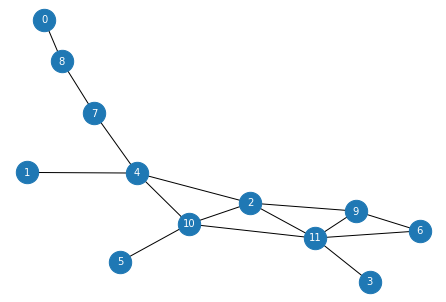

In [11]:
pos = nx.spring_layout(G)

nx.draw(G, pos, with_labels=True, node_size=500, font_size=10, font_color='w')

In [ ]:
stableset = gb.Model()
x = stableset.addVars(G.number_of_nodes(), vtype=gb.GRB.BINARY, name='x')
stableset.setObjective(x.sum(),sense=gb.GRB.MAXIMIZE)


Academic license - for non-commercial use only


In [ ]:
stableset.addConstrs((x[i] + x[j] <= 1 for i,j in G.edges()), name='edge')
stableset.update()


In [ ]:
stableset.optimize()

Optimize a model with 15 rows, 12 columns and 30 nonzeros
Variable types: 0 continuous, 12 integer (12 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 7.0000000
Presolve removed 15 rows and 12 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds
Thread count was 1 (of 8 available processors)

Solution count 1: 7 

Optimal solution found (tolerance 1.00e-04)
Best objective 7.000000000000e+00, best bound 7.000000000000e+00, gap 0.0000%


In [ ]:
print('Obj: %g' % stableset.objVal)

print ()

stablenodes = list()

for i in G.nodes():
    if (x[i].x > 1e-6):
        stablenodes.append(i)



Obj: 7



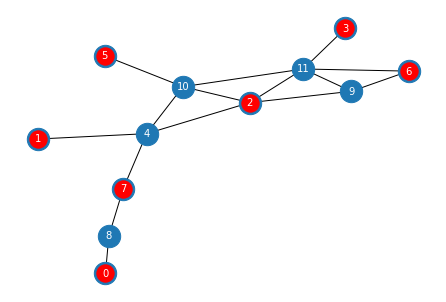

In [ ]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, font_size=10, font_color='w')

nx.draw_networkx_nodes(G, pos, with_labels=True, nodelist = stablenodes, node_color ='r')